# ***Sleep Disorders Analysis***

Sleep plays a crucial role in safeguarding both our physical and mental well-being. Ensuring high-quality sleep positively influences vital bodily functions such as blood circulation, metabolism, respiratory health, and memory retention, among others.

However, when proper sleep is elusive, it can lead to various sleep disorders and associated health complications.

These disorders manifest in diverse forms, ranging from insomnia, characterized by difficulty initiating sleep, to hypersomnia, marked by excessive daytime sleepiness and fatigue. Other common conditions include Obstructive Sleep Apnea, which involves breathing disturbances during sleep, and parasomnias, which entail abnormal behaviors during sleep cycles.

Such issues are widespread, affecting a substantial portion of the population. In Brazil, for instance, over 70% suffer with sleep disorders, while in the United States, more than 50 million individuals are impacted.

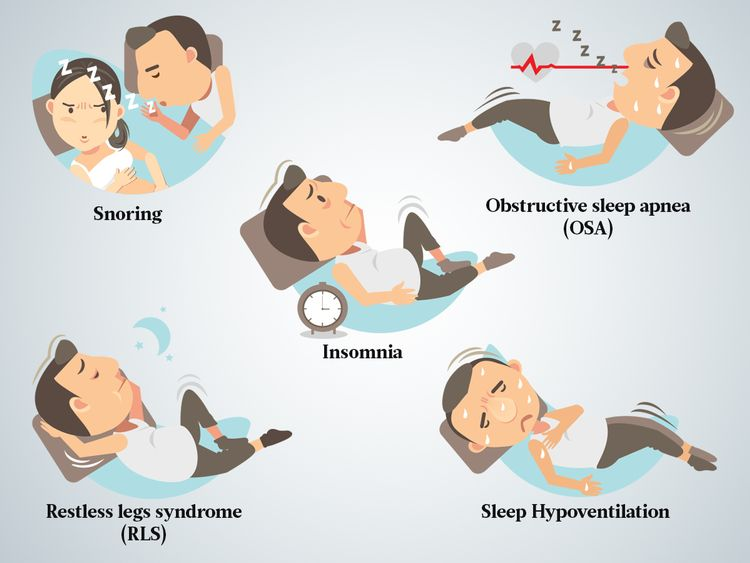

## 1.Objectives of the Study

The primary goals of this Exploratory Data Analysis (EDA) are as follows:

1. Profile Analysis: Discern the profile of individuals affected by sleep disorders. Understanding the demographic and lifestyle characteristics of this group is crucial for developing targeted interventions and support.

2. Correlation with Health and Lifestyle Variables: This EDA aims to investigate how general sleep issues correlate with health and lifestyle variables present in the dataset. Identifying patterns and relationships between sleep disorders and other variables can provide valuable insights into potential influencing factors.

To achieve these objectives, an in-depth analysis of the majority of variables within the dataset will be conducted. Through this comprehensive examination, we seek to draw conclusions and propose possible intervations for individuals experiencing sleep disorders.

##2.Reading the CSV File and Loading Libraries

The data was obtained through Kaggle, the largest website related to Machine Learning and Data Science.

You can check the source of the dataset through this link: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [ ]:
# Libraries Related to Data Analysis

# Data Manipulation

import pandas as pd
import numpy as np

# Data Visualization

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tabulate import tabulate

# csv file

df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
# Definition of colors for plots

GREY1, GREY2, GREY3 = '#231F20', '#414040', '#555655'
GREY4, GREY5, GREY6 = '#646369', '#76787B', '#828282'
GREY7, GREY8, GREY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2, RED3, RED4, RED5 = '#DB0527', '#E23652', '#ED8293', '#F4B4BE', '#FBE6E9'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'
YELLOW1, YELLOW2, YELLOW13, YELLOW14, YELLOW15 = '#FFC700', '#FFCC19', '#FFEB51', '#FFE37F', '#FFEEB2'
WHITE = '#FFFFFF'

##3.Understanding the Variables

Person ID:

-  Identifier for each person.

Gender:

- Gender of the individual (Male/Female).

Age:

- The age of the person.

Occupation:

-  Profession of the person.

Sleep Duration (hours):

- Number of hours the person sleeps/day.

Quality of Sleep:

- A subjective rating of the quality of sleep.
- Values ranging from 1 to 10.

Physical Activity Level (minutes/day):

- The number of minutes the person engages in physical activity daily.

Stress Level:

- A subjective rating of the stress level experienced by the person.
- Values ranging from 1 to 10.

BMI Category:

- The BMI category of the person

Blood Pressure:
    
- The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

Heart Rate (bpm):

- The resting heart rate of the person in beats per minute.

Daily Steps:

- The number of steps the person takes/day.

Sleep Disorder:

- The presence or absence of a sleep disorder in the person.

##4.Data Cleaning and General Info

In [ ]:
# Running the dataset
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
# Rows X Columns

print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 374 rows and 13 columns


In [ ]:
# Checking numerical x categorical

num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical = df.select_dtypes(include=num)
categoric = df.select_dtypes(exclude=num)

print(f'The Dataset has {numerical.shape[1]} numerical columns and {categoric.shape[1]} categorical')

The Dataset has 8 numerical columns and 5 categorical


In [ ]:
# Checking data types

df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [ ]:
# Checking Duplicated Records

duplicated = df.duplicated().sum()

if duplicated > 0:
    print(f"We have {duplicated} values in the dataset")
else:
    print("There are no duplicated values in the dataset")

There are no duplicated values in the dataset


In [ ]:
# Checking Missing Values

cel = np.product(df.shape)
missing = df.isnull().sum()

percent = (missing/cel)*100

print("Percent of Missing Values:")

table = tabulate(percent.reset_index(), headers=['Columns', '% Of Missing Values'], tablefmt=("heavy_grid"))

print(table)

Percent of Missing Values:
┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃    ┃ Columns                 ┃   % Of Missing Values ┃
┣━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━┫
┃  0 ┃ Person ID               ┃               0       ┃
┣━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━┫
┃  1 ┃ Gender                  ┃               0       ┃
┣━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━┫
┃  2 ┃ Age                     ┃               0       ┃
┣━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━┫
┃  3 ┃ Occupation              ┃               0       ┃
┣━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━┫
┃  4 ┃ Sleep Duration          ┃               0       ┃
┣━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━┫
┃  5 ┃ Quality of Sleep        ┃               0       ┃
┣━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━┫
┃  6 ┃ Physical Activity Level ┃               0       ┃
┣━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━┫
┃  7

People without Sleep Disorders are being considered as Nulls in this column. Lets replace the null for a value.

In [ ]:
# Replacing nulls for "None"

df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

In [ ]:
# Checking Quantity of Unique Values In Categorical Columns

select_unique = df.select_dtypes(include='object')

unique_cat = select_unique.nunique()

print('Quantity of Unique Values in Categorical Columns:')
print(unique_cat)

Quantity of Unique Values in Categorical Columns:
Gender             2
Occupation        11
BMI Category       4
Blood Pressure    25
Sleep Disorder     3
dtype: int64


In [ ]:
# Checking the Values of Each Categorical Column

cols_cat = df.select_dtypes(include="object")

unique_info=[]

for x in cols_cat:
    unique_info.append({'Columns': x, 'Values':set(df[x])})

table = tabulate(unique_info, headers='keys', tablefmt="heavy_grid" )

print('Unique Values of each Categorical Table:')

print(table)

Unique Values of each Categorical Table:
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Columns        ┃ Values                                                                                                                                                                                                                                                     ┃
┣━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃ Gender         ┃ {'Female', 'Male'}                                                                                                          

As we can see on the column "BMI Category", the label "Normal" is repeated. Lets standardize this.

In [ ]:
# Establishing one value for "Normal" in the column BMI Category

# First lets check the number of occurencies of each Normal label.

normal_count = df.loc[df['BMI Category'] == 'Normal']
normal_weight_count = df.loc[df['BMI Category'] == 'Normal Weight']

contagem_normal = normal_count['BMI Category'].value_counts()
contagem_normal_weight = normal_weight_count['BMI Category'].value_counts()

data = [('Normal', contagem_normal.get('Normal', 0)),
        ('Normal Weight', contagem_normal_weight.get('Normal Weight', 0))]

table = tabulate(data, headers=['Categoria', 'Contagem'], tablefmt='grid')

print(table)

+---------------+------------+
| Categoria     |   Contagem |
+===============+============+
| Normal        |        195 |
+---------------+------------+
| Normal Weight |         21 |
+---------------+------------+


In [ ]:
# Replace Normal for Normal Weight

df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

count = df['BMI Category'].value_counts()

# Checking
checking = tabulate(count.reset_index(), headers=['BMI Category', 'Count'], tablefmt='grid')

print(checking)

+----+----------------+---------+
|    | BMI Category   |   Count |
+====+================+=========+
|  0 | Normal         |     216 |
+----+----------------+---------+
|  1 | Overweight     |     148 |
+----+----------------+---------+
|  2 | Obese          |      10 |
+----+----------------+---------+


In [ ]:
# Creating a column to represent the count of persons with or without Disorder

df['HaveSleepDisorder'] = np.where(df['Sleep Disorder'] == 'None', 'No', 'Yes')

check = df['HaveSleepDisorder'].value_counts()

check

HaveSleepDisorder
No     219
Yes    155
Name: count, dtype: int64

In [ ]:
# Statistical data

df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Some information about the variables above:

- The minimum Age is 27 years, whereas the max is 59;
- Sleep Duration starts at 5.8 hours, with a maximum of 8.5 hrs;
- Quality of sleep varies from 4 to 9;
- Physical Activity Level starts at 30.0 and comes to 90.0;
- Stress Level varies from 3 to 8;
- Heart Rate from 65.0 to 86.0;
- And the daily steps from 3000 to 10.000;

Another important piece of information:

- The mean and the median (50%) are very close for all variables.
- This indicates that we can confidently use the mean without concern that it is influenced by outliers.

## 5.Initial Data Exploration

- Here, we'll explore the main insights of the dataset. I've concentrated on key categories such as Gender, Age, and Occupation, aiming to provide an overview of each and examine the sleep variables within each category.

### 5.1 Gender

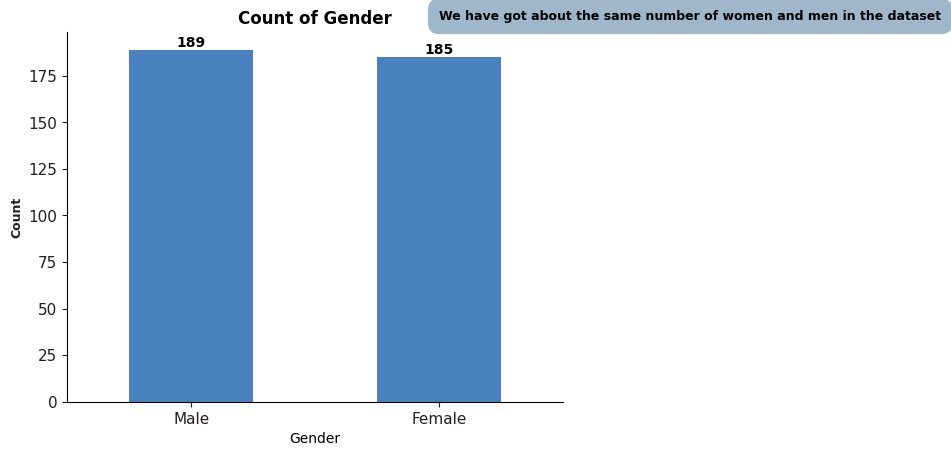

In [ ]:
# Grouping gender

gender_count = df['Gender'].value_counts()

# Plot

fig, axes = plt.subplots(1, 1)

bar = gender_count.plot(kind='bar', ax=axes, color=BLUE2)
bar.set_xticklabels(gender_count.index, rotation=0)

plt.title('Count of Gender', fontweight="bold")

bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)

# Remove grid

axes.grid(False)

# Configs for y label

axes.set_ylabel('Count', color=GREY1, fontsize=9, fontweight='bold')

# Defining colors for x and y

axes.tick_params(axis='x', colors=GREY1, labelsize=11)
axes.tick_params(axis='y', colors=GREY1, labelsize=11)

# Labels

for x, y in enumerate(gender_count):
        bar.text(x, y, str(y), ha='center', va='bottom', fontsize=10, fontweight="black")

# Text in the plot

bar.text(1.0,
         gender_count[1]+20
         , 'We have got about the same number of women and men in the dataset',
         bbox={'facecolor': BLUE4, 'alpha':0.9, 'pad':0.9, 'edgecolor': 'none', 'boxstyle':'round'}, color='black',
         fontsize=9,fontweight="black")

plt.show()

In [ ]:
# Gender x Sleep Duration

# It's interesting to understand the general distribution of hours of sleep for each gender

fig = make_subplots(rows=1, cols=2)

font_size = 14

fig.add_trace(go.Box(x=df['Gender'],
                     y=df['Sleep Duration'],
                     name='Sleep Duration'
                     ), row=1, col=1)

fig.update_xaxes(title_text="Gender", row=1, col=1,
                 title_font=dict(size=font_size))

# Gender x Sleep Quality

fig.add_trace(go.Box(x=df['Gender'],
                     y=df['Quality of Sleep'],
                     name='Sleep Quality'
                     ), row=1, col=2)

fig.update_xaxes(title_text="Gender", row=1, col=2,
                 title_font=dict(size=font_size))

fig.update_layout(title='Gender x Sleep Duration and Quality')

fig.update_yaxes(title_text='Level')

fig.show()


Sleep Duration:

- Both genders have the same median (7.2 hours).
- However, they have distinct distributions. The majority of women's data is concentrated above the median, suggesting they sleep longer.
- In contrast, the majority of men's data is concentrated below the median, indicating they sleep less.

Sleep Quality:

- Here, the medians differ: 7 for men and 8 for women.
- Both genders have sleep quality distributions that appear to be symmetrical, as evidenced by the boxplots.
- However, when comparing the two boxplots, significant differences in distribution between genders are noted. The distribution for women appears to be skewed towards higher values of sleep quality.
- Most likely, the fact that females sleep more directly influences their higher sleep quality.

In [ ]:
# Sleep Disorder

# Grouping Gender and Sleep Disorder

count_disorder = df.groupby('Gender')['Sleep Disorder'].value_counts().reset_index(name='Disorder Count')

# Colors

colors = ['grey', 'black', 'darkblue']

# Creating the figure

fig = go.Figure()

# Plot 1

for i, category in enumerate(count_disorder['Sleep Disorder'].unique()):
    filtered_data = count_disorder[count_disorder['Sleep Disorder'] == category]
    fig.add_trace(go.Bar(
        x=filtered_data['Gender'],
        y=filtered_data['Disorder Count'],
        name=category,
        marker_color=colors[i],  # Assigning different color to each category
    ))

# Update layout

fig.update_layout(
    title='Sleep Disorder by Gender',
    xaxis_title='Gender',
    yaxis_title='Count',
    xaxis=dict(showgrid=False),  # Disable gridlines on the x-axis
    yaxis=dict(showgrid=False)   # Disable gridlines on the y-axis
)


# Adding Text

fig.add_annotation(
    x=count_disorder['Gender'][0],  # X position
    y=count_disorder['Disorder Count'].max() + 70,  # Y position
    text="Women have the highest number, with 103 experiencing sleep disorders, compared to only 52 men",
    showarrow=False,
    font=dict(
        size=16,
        color=GREY1))

# Show figure
fig.show()

### 5.2 Age

In [ ]:
# Creating Age Range

num = [26, 40, 50, 60]
agerange = ['26 to 39', '40 to 49', '50 to 59']
df['Age Range'] = pd.cut(df['Age'], bins=num, labels=agerange)

 # Grouping Age Range

age_count = df.groupby('Age Range').size().reset_index(name='Count')

# Plot

fig = go.Figure()

fig.add_trace(go.Bar(x=age_count['Age Range'], y=age_count['Count'], marker_color=BLUE1))

fig.update_layout(title='Count per Age Group', xaxis_title='Age Range', yaxis_title='Count')

# Adding text

for i, count in enumerate(age_count['Count']):
    fig.add_annotation(
        x=age_count['Age Range'][i],
        y=count,
        text=str(count),
        showarrow=True,
        arrowhead=1,
        font=dict(size=14))

# Adding text

fig.add_annotation(
    x=age_count['Age Range'][0],  # X position
    y=age_count['Count'].max() + 70,  # Y position
    text="The plot reveals that there are more individuals in the 26 to 39 age range in the Dataset",
    showarrow=False,
    font=dict(
        size=16,  # Tamanho da fonte do texto
        color=GREY1  # Cor do texto
    )
)

# Showing the plot

fig.show()

In [ ]:
# Duration

fig = make_subplots(rows=1, cols=2)

font_size = 14

fig.add_trace(go.Box(x=df['Age Range'],
                     y=df['Sleep Duration'],
                     name='Sleep Duration'
                     ), row=1, col=1)

fig.update_xaxes(title_text="Age Range", row=1, col=1,
                 title_font=dict(size=font_size))


# Quality

fig.add_trace(go.Box(x=df['Age Range'],
                     y=df['Quality of Sleep'],
                    name='Sleep Quality'
                     ), row=1, col=2)

fig.update_xaxes(title_text="Age Range", row=1, col=2,
                 title_font=dict(size=font_size))

fig.update_layout(title='Age Range x Sleep Duration and Quality')

fig.update_yaxes(title_text='Level')

fig.show()

Sleep Duration:

- As we observe, there's a noticeable contrast between the age groups of 26 to 39 and 40 to 49, compared to those aged 50 to 59.
- These age brackets exhibit distinct median values.

- For the 26 to 39 group, the median is 7.2, with most data points concentrated below it.

- Conversely, the 40 to 49 group has a lower median, yet the majority of data falls above it.

- Meanwhile, individuals aged 50 to 59 enjoy longer sleep durations, boasting a median of 8.2, with data mostly concentrated above the 8-hour mark. Additionally, this group presents some outliers.


Sleep Quality

- Clearly, the 50-59 age group enjoys the highest sleep quality, as most data points are concentrated at the highest level.
- Conversely, both the 26-39 and 40-49 age groups exhibit lower sleep quality. These two groups share the same medians and display similar distributions, ranging from levels 6 to 8.

In [ ]:
# Sleep Disorder

# grouping Gender and Sleep Disorder
count_disorder_age = df.groupby('Age Range')['Sleep Disorder'].value_counts().reset_index(name='Disorder Count')

# colors
colors = ['grey', 'black', 'darkblue']

# Create the figure
fig = make_subplots(rows=1, cols=1)

# Plot 1
for i, category in enumerate(count_disorder_age['Sleep Disorder'].unique()):
    filtered_data2 = count_disorder_age[count_disorder_age['Sleep Disorder'] == category]
    fig.add_trace(go.Bar(
        x=filtered_data2['Age Range'],
        y=filtered_data2['Disorder Count'],
        name=category,
        marker_color=colors[i],  # Assigning different color to each category
    ),
        row=1, col=1
    )

# Update layout
fig.update_layout(
    title='Sleep Disorder by Age Range',
    xaxis_title='Age Range',
    yaxis_title='Count',
    xaxis=dict(showgrid=False),  # Disable gridlines on the x-axis
    yaxis=dict(showgrid=False)   # Disable gridlines on the y-axis
)


# Adding Text
fig.add_annotation(
    x=count_disorder_age['Age Range'][0],  # X Position
    y=count_disorder_age['Disorder Count'].max() + 30,  # Y position
    text="People from 40-49 range have the highest number of Sleep Disorders(93), with most of them suffering from insomnia",
    showarrow=False,
    font=dict(
        size=14,
        color=GREY1
    )
)

# Show figure
fig.show()

### 5.3 Occupation


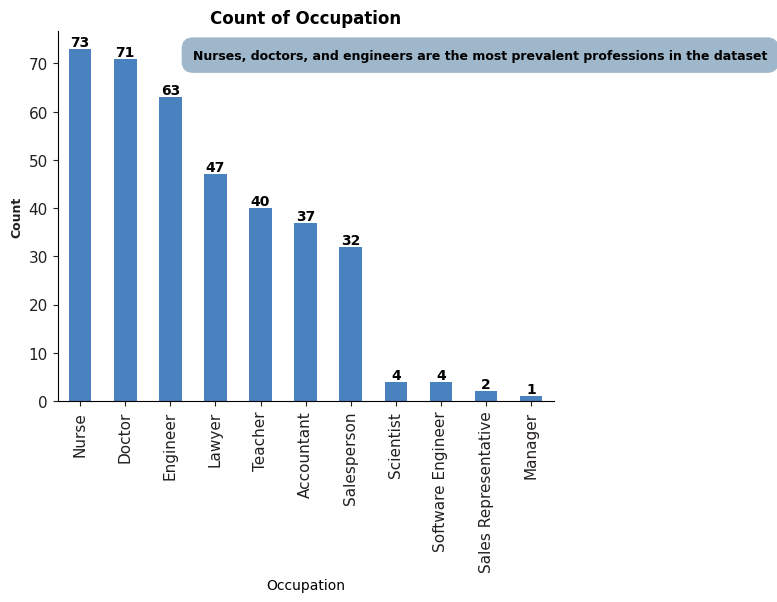

In [ ]:
# Grouping Occupation
ocup_group = df.groupby('Occupation').size().sort_values(ascending=False)

# Plot
fig, axes = plt.subplots(1, 1)

bar = ocup_group.plot(kind='bar', ax=axes, color=BLUE2)
bar.set_xticks(range(len(ocup_group)))
bar.set_xticklabels(ocup_group.index, rotation=0)

plt.title('Count of Occupation', fontweight="bold")

bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)

# Remove grid
axes.grid(False)

# Labels y y
axes.set_ylabel('Count', color=GREY1, fontsize=9, fontweight='bold')
plt.xticks(rotation=90)

# Defining colors
axes.tick_params(axis='x', colors=GREY1, labelsize=11)
axes.tick_params(axis='y', colors=GREY1, labelsize=11)

# Labels
for x, y in enumerate(ocup_group):
        bar.text(x, y, str(y), ha='center', va='bottom', fontsize=10, fontweight="black")

# Annotate
bar.text(2.5,
         ocup_group[1]
         , 'Nurses, doctors, and engineers are the most prevalent professions in the dataset',
         bbox={'facecolor': BLUE4, 'alpha':0.9, 'pad':0.9, 'edgecolor': 'none', 'boxstyle':'round'}, color='black',
         fontsize=9,fontweight="black")

# Showing plot
plt.show()

In [ ]:
# Occupation x Sleep Duration
fig = make_subplots(rows=1, cols=2)

font_size = 14

fig.add_trace(go.Box(x=df['Occupation'],
                     y=df['Sleep Duration'],
                     name='Sleep Duration'
                     ), row=1, col=1)

fig.update_xaxes(title_text="Occupation", row=1, col=1,
                 title_font=dict(size=font_size))


# Occupation x Sleep Quality
fig.add_trace(go.Box(x=df['Occupation'],
                     y=df['Quality of Sleep'],
                    name='Sleep Quality'
                     ), row=1, col=2)

fig.update_xaxes(title_text="Occupation", row=1, col=2,
                 title_font=dict(size=font_size))

fig.update_layout(title='Occupation x Sleep Duration and Quality')
fig.update_yaxes(title_text='Level')

# Show plot
fig.show()

In [ ]:
# Top 5 Occupations With most Sleep Disorders

# Grouping
occupation_count_disorder = df.groupby('Occupation')['HaveSleepDisorder'].value_counts().reset_index(name='Count')

# Getting the top 5 with most disorders
occupation_group_top5 = occupation_count_disorder[occupation_count_disorder['HaveSleepDisorder'] == 'Yes'].sort_values(by='Count', ascending=False).head(5)

# Plot
fig = go.Figure()
fig.add_trace(go.Bar(x=occupation_group_top5['Occupation'],
                     y=occupation_group_top5['Count'],
                     name='Top 5 with Most Disorders'))

# Layout
fig.update_layout(title='Top 5 Occupation Groups with Highest Sleep Disorder Cases',yaxis_title='Count')

# Showing Graph
fig.show()


Possible Relationship between Occupation and Sleep Disturbances:

- The Sleep Disturbances graph shows that occupations that require longer working hours, high stress levels, and responsibilities may be associated with a higher risk of sleep disturbances.

- For example, nurses, teachers, and doctors typically work long hours, have high stress levels, and deal with high-pressure situations, which can contribute to the development of sleep disturbances.

## 6.Understanding Stress Levels x Sleep Variables

- The objective here is to understand the relationship between stress levels and sleep variables, such as sleep quality, hours slept, and sleep disturbances. The analysis also examines differences by gender, age, and occupation.


### 6.1 General Trends


In [ ]:
# Creating a Stress Level range, it will be easier to analyze in the visualizations

num = [2, 5, 8]
StressRange = ['3 to 5', '6 to 8']
df['StressRange'] = pd.cut(df['Stress Level'], bins=num, labels=StressRange)
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,HaveSleepDisorder,Age Range,StressRange
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,No,26 to 39,6 to 8
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,No,26 to 39,6 to 8
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,No,26 to 39,6 to 8
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Yes,26 to 39,6 to 8
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Yes,26 to 39,6 to 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Yes,50 to 59,3 to 5
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Yes,50 to 59,3 to 5
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Yes,50 to 59,3 to 5
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Yes,50 to 59,3 to 5


In [ ]:
# Overall stress Level x Quality and Sleep Duration
# How the stress level is related to the quality and Sleep Duration?

# Creating Subplot
fig = make_subplots(rows=2, cols=1)

# Calculating the linear trendline
trendline_duration = np.polyfit(df['Stress Level'], df['Sleep Duration'], 1)
trendline_quality = np.polyfit(df['Stress Level'], df['Quality of Sleep'], 1)

# Generating the y values for the trendline
trendline_duration_y = np.polyval(trendline_duration, df['Stress Level'])
trendline_quality_y = np.polyval(trendline_quality, df['Stress Level'])

# First Plot
fig.add_trace(go.Scatter(x=df['Stress Level'], y=df['Sleep Duration'], mode='markers', name='Sleep Duration Data'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['Stress Level'], y=trendline_duration_y, mode='lines', name='Sleep Duration Trendline'), row=1, col=1)

fig.update_xaxes(title_text='Stress Level', row=1, col=1)
fig.update_yaxes(title_text='Sleep Duration', row=1, col=1)

# Second Plot
fig.add_trace(go.Scatter(x=df['Stress Level'], y=df['Quality of Sleep'], mode='markers', name='Sleep Quality Data'), row=2, col=1)
fig.add_trace(go.Scatter(x=df['Stress Level'], y=trendline_quality_y, mode='lines', name='Sleep Quality Trendline'), row=2, col=1)

fig.update_xaxes(title_text='Stress Level', row=2, col=1)
fig.update_yaxes(title_text='Sleep Quality', row=2, col=1)

fig.update_layout(title='Stress Level x Sleep Quality and Duration')

fig.show()

Correlation between Sleep Duration x Quality x Stress Level:

- The graph demonstrates a positive correlation between longer sleep duration, better sleep quality, and lower stress levels. This implies that individuals who sleep more and have higher sleep quality tend to report lower stress levels.

- However, its essential to remember that correlation does not imply causation. While the data reveals a relationship between sleep and stress, they do not definitively prove that getting more sleep directly causes less stress. Other factors could be influencing both sleep and stress levels.

In [ ]:
# Stress Level x Sleep Disorders

# Now lets group the stress level range and the sleep disorders
group_stress_disorder = df.groupby('HaveSleepDisorder')['StressRange'].value_counts().reset_index(name='Count')

# Creating plot
fig = go.Figure()

fig.add_trace(go.Bar(
    x=group_stress_disorder['StressRange'],
    y=group_stress_disorder['Count'][group_stress_disorder['HaveSleepDisorder'] == 'Yes'],
    name='Yes'
))

fig.add_trace(go.Bar(
    x=group_stress_disorder['StressRange'],
    y=group_stress_disorder['Count'][group_stress_disorder['HaveSleepDisorder'] == 'No'],
    name='No'
))

# Layout
fig.update_layout(
    title='Count of Sleep Disorders per Stress Range',
    xaxis=dict(title='Stress Range'),
    yaxis=dict(title='Count'),
    barmode='group'
)

# Show plot
fig.show()

- Here, we can observe that the majority of individuals with a stress level ranging from 3 to 5 do not have sleep disorders, whereas the disparity between those with stress levels of 6 to 8, whether they have disorders or not, is smaller.

###6.2 Gender

In [ ]:
# Stress Range x Gender
group_stress_gender = df.groupby('Gender')['StressRange'].value_counts().reset_index(name='Count')

# Plot
fig = go.Figure()
fig.add_trace(go.Bar(
    y=group_stress_gender['StressRange'],
    x=group_stress_gender['Count'][group_stress_gender['Gender'] == 'Male'],
    orientation='h',
    name='Male'
))

fig.add_trace(go.Bar(
    y=group_stress_gender['StressRange'],
    x=group_stress_gender['Count'][group_stress_gender['Gender'] == 'Female'],
    orientation='h',
    name='Female'
))

# Layout
fig.update_layout(
    title='Count of Gender per Stress Range',
    yaxis=dict(title='Stress Range'),
    xaxis=dict(title='Count'),
    barmode='group'
)

# Show plot

fig.show()

- We can observe that males exhibit higher levels of stress compared to females. This is evident from the higher count of males in the 6-8 stress range, while females show a higher count in the 3-5 range.

In [ ]:
# Sleep quality by Stress Range and Gender
grouped_data = df.groupby(['Gender', 'StressRange'])['Quality of Sleep'].mean().reset_index()

# Plot
fig = px.bar(grouped_data, x='StressRange', y='Quality of Sleep', color='Gender', barmode='group',
             title='Mean Sleep Quality by Stress Range and Gender',
             labels={'SleepQuality': 'Mean Sleep Quality', 'StressRange': 'Stress Range'},
             color_discrete_map={'Male': 'blue', 'Female': 'red'})

# Show plot
fig.show()

- Overall, individuals with the lowest stress range exhibit higher quality sleep. This pattern is consistent across both genders, with a mean score close to 8 for each.

- Conversely, those with stress levels between 6 and 8 tend to have a mean quality of sleep close to 6.

###6.3 Age

In [ ]:
# Age Range x Stress Range

# Grouping
group_stress_age = df.groupby('StressRange')['Age Range'].value_counts().unstack().fillna(0)

# List
age_ranges = group_stress_age.columns.tolist()

# Count by stress range
count_per_stress = [group_stress_age[age].tolist() for age in age_ranges]

# Plot
fig = go.Figure()

for i, age_range in enumerate(age_ranges):
    fig.add_trace(go.Bar(
        x=group_stress_age.index,
        y=count_per_stress[i],
        name=age_range
    ))

# Layout
fig.update_layout(
    title='Count of Age Range per Stress Range',
    xaxis=dict(title='Stress Range'),
    yaxis=dict(title='Count'),
    barmode='group')


# Show plot
fig.show()

- We can see that 26-39 have the largest count in each stress range. However, there is a larger amount of people of this range with higher stress. Besides that, this trend repeats for persons with 40-49. On the other hand, 50-59

###6.4 Occupation

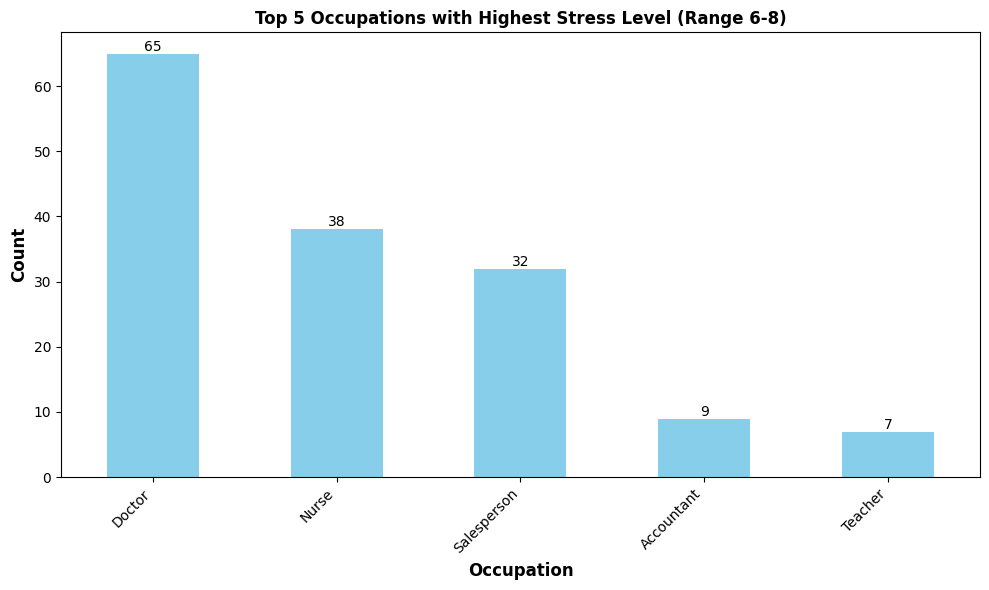

In [ ]:
# Which Occupations have the biggest count of the highest stress range (6-8)?

# Filtrando a faixa de estresse 6-8
filtered_data = df[df['StressRange'].isin(['6 to 8'])]

# Agrupando por ocupação
grouped_occupation = filtered_data['Occupation'].value_counts()

# Selecionando as top 5
top_5_occupations = grouped_occupation.nlargest(5)

# Plotagem
plt.figure(figsize=(10, 6))

bar = top_5_occupations.plot(kind='bar', color='skyblue')

# Título e margens
plt.title('Top 5 Occupations with Highest Stress Level (Range 6-8)', fontweight='bold')

plt.xlabel('Occupation', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Anotações
for i, value in enumerate(top_5_occupations):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Mostrar plot
plt.show()


- We can observe that some of the occupations with the poorest duration and quality of sleep, as mentioned earlier, align with those occupations that have the highest levels of stress. Doctors, nurses, and salespersons stand out the most in this regard

##7.BMI Category x Sleep Variables

- The objective in this topic is to explore the connection between BMI categories and various sleep variables. Additionally, we aim to investigate potential differences across different BMI categories concerning sleep patterns.

####7.1 General Trends

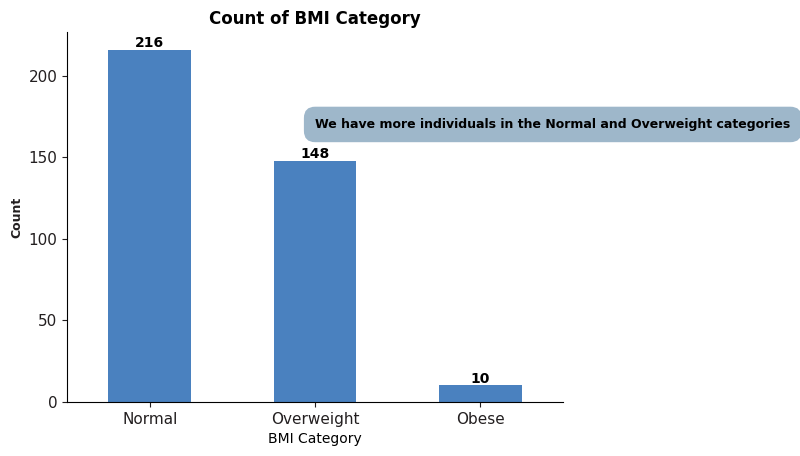

In [ ]:
# Grouping

bmi_count = df['BMI Category'].value_counts()

# Plot

fig, axes = plt.subplots(1, 1)

bar = bmi_count.plot(kind='bar', ax=axes, color=BLUE2)
bar.set_xticklabels(bmi_count.index, rotation=0)

plt.title('Count of BMI Category', fontweight="bold")

bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)

# Remove grid

axes.grid(False)

# Configs for y label

axes.set_ylabel('Count', color=GREY1, fontsize=9, fontweight='bold')

# Defining colors for x and y

axes.tick_params(axis='x', colors=GREY1, labelsize=11)
axes.tick_params(axis='y', colors=GREY1, labelsize=11)

# Labels

for x, y in enumerate(bmi_count):
        bar.text(x, y, str(y), ha='center', va='bottom', fontsize=10, fontweight="black")

# Text in the plot

bar.text(1.0,
         bmi_count[1]+20
         , 'We have more individuals in the Normal and Overweight categories',
         bbox={'facecolor': BLUE4, 'alpha':0.9, 'pad':0.9, 'edgecolor': 'none', 'boxstyle':'round'}, color='black',
         fontsize=9,fontweight="black")

plt.show()


In [ ]:
# Creating Subplot
fig = make_subplots(rows=1, cols=2)

# First Plot: Boxplot for Sleep Duration
fig.add_trace(go.Box(x=df['BMI Category'], y=df['Sleep Duration'], name='Sleep Duration'), row=1, col=1)
fig.update_xaxes(title_text='BMI Category', row=1, col=1)
fig.update_yaxes(title_text='Sleep Duration', row=1, col=1)

# Second Plot: Boxplot for Sleep Quality
fig.add_trace(go.Box(x=df['BMI Category'], y=df['Quality of Sleep'], name='Sleep Quality'), row=1, col=2)
fig.update_xaxes(title_text='BMI Category', row=2, col=1)
fig.update_yaxes(title_text='Sleep Quality', row=2, col=1)

# Update layout
fig.update_layout(title='BMI Category x Sleep Duration and Quality')

# Show the plot
fig.show()

- It's evident that the majority of obese individuals sleep less than 7.3 hours, which is the median for this group. Additionally, overweight individuals also tend to have inadequate sleep durations.

- This lack of sufficient sleep directly impacts the quality of rest. Most obese individuals experience poor sleep quality. Conversely, overweight individuals generally enjoy better sleep quality than obeses.

- Normal-weight individuals, as observed, typically achieve both adequate sleep durations and good sleep quality.







In [ ]:
# Sleep Disorders x BMI Category

# Agrupamento
group_bmi_disorder = df.groupby('Sleep Disorder')['BMI Category'].value_counts().unstack().fillna(0)

# Lista
disorder_list = group_bmi_disorder.index.tolist()

# Contagem por Sleep Disorder
count_per_disorder = [group_bmi_disorder.loc[disorder].tolist() for disorder in disorder_list]

# Plotagem
fig = go.Figure()

for i, disorder in enumerate(disorder_list):
    fig.add_trace(go.Bar(
        x=group_bmi_disorder.columns,
        y=count_per_disorder[i],
        name=disorder
    ))

# Layout
fig.update_layout(
    title='Count of BMI Category per Sleep Disorder',
    xaxis=dict(title='BMI Category'),
    yaxis=dict(title='Count'),
    barmode='group'
)

# Mostrar gráfico
fig.show()


- It's noticeable that most individuals in the normal category don't experience sleep disorders.

- Conversely, a majority of those classified as Overweight suffer from sleep disorders, and all individuals classified as Obese also experience them.

####7.2 Gender

In [ ]:
# Gender x BMI Category
group_gender_bmi = df.groupby('Gender')['BMI Category'].value_counts().reset_index(name='Count')

# Plotagem
fig = go.Figure()

fig.add_trace(go.Bar(
    x=group_gender_bmi[group_gender_bmi['Gender'] == 'Male']['BMI Category'],
    y=group_gender_bmi[group_gender_bmi['Gender'] == 'Male']['Count'],
    name='Male',
    marker_color='skyblue'
))

fig.add_trace(go.Bar(
    x=group_gender_bmi[group_gender_bmi['Gender'] == 'Female']['BMI Category'],
    y=group_gender_bmi[group_gender_bmi['Gender'] == 'Female']['Count'],
    name='Female',
    marker_color='salmon'
))

# Layout
fig.update_layout(
    title='Count of Gender per BMI Category',
    xaxis=dict(title='BMI Category'),
    yaxis=dict(title='Count'),
    barmode='group'
)

# Show plot
fig.show()


- Here, we can observe a greater number of males in the normal category. Additionally, the obese category is predominantly composed of males, while the overweight category is mainly comprised of females.

In [ ]:
# Gender x BMI Category x HaveSleepDisorder
group_gender_bmi_sleep = df.groupby(['Gender', 'BMI Category', 'HaveSleepDisorder']).size().reset_index(name='Count')

# Criando subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Male', 'Female'))

# Definindo cores
colors = {'Yes': 'red', 'No': 'blue'}

for i, gender in enumerate(['Male', 'Female'], start=1):
    for sleep in ['Yes', 'No']:  # 'Yes' = HaveSleepDisorder, 'No' = No HaveSleepDisorder
        data = group_gender_bmi_sleep[(group_gender_bmi_sleep['Gender'] == gender) & (group_gender_bmi_sleep['HaveSleepDisorder'] == sleep)]
        fig.add_trace(go.Bar(
            x=data['BMI Category'],
            y=data['Count'],
            name=sleep,
            marker_color=colors[sleep]
        ), row=1, col=i)

# Atualizando layout
fig.update_layout(
    title='Count of Gender and HaveSleepDisorder per BMI Category',
    xaxis=dict(title='BMI Category'),
    yaxis=dict(title='Count'),
    barmode='group'
)

# Atualizando layout dos subplots
fig.update_layout(
    height=600,  # ajuste conforme necessário
    showlegend=True)


# Mostrando o gráfico
fig.show()


- Here, we observe a consistent trend across both males and females.

- In the normal category, a majority of individuals are without sleep disorders in both genders.

- However, in the obese category, all individuals exhibit sleep disorders, while in the overweight category, there are more individuals with sleep disorders than without in both genders.



####7.3 Age

In [ ]:
# Gender x BMI Category x HaveSleepDisorder
group_age_bmi_sleep = df.groupby(['Age Range', 'BMI Category', 'HaveSleepDisorder']).size().reset_index(name='Count')

# Criando subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=('26 to 39', '40 to 49', '50 to 59'))

# Definindo cores
colors = {'Yes': 'red', 'No': 'blue'}

for i, age_range in enumerate(['26 to 39', '40 to 49', '50 to 59'], start=1):
    for sleep in ['Yes', 'No']:  # 'Yes' = HaveSleepDisorder, 'No' = No HaveSleepDisorder
        data = group_age_bmi_sleep[(group_age_bmi_sleep['Age Range'] == age_range) & (group_age_bmi_sleep['HaveSleepDisorder'] == sleep)]
        fig.add_trace(go.Bar(
            x=data['BMI Category'],
            y=data['Count'],
            name=sleep,
            marker_color=colors[sleep]
        ), row=1, col=i)

# Atualizando layout
fig.update_layout(
    title='Count of Age Range and HaveSleepDisorder per BMI Category',
    yaxis=dict(title='Count'),
    barmode='group'
)

# Atualizando layout dos subplots
fig.update_layout(
    height=600,  # ajuste conforme necessário
    showlegend=True
)

# Mostrando o gráfico
fig.show()


- We observe that the majority of individuals aged 26 to 39 fall into the normal category. Furthermore, most of these individuals do not experience sleep disorders.

- Conversely, individuals aged 40-49 and 50-59 are predominantly overweight and suffer from sleep disorders.

####7.4 Occupation

In [ ]:
# Top 5 occupations
top_5_occupations = df['Occupation'].value_counts().nlargest(5).index

# Criando subplots
fig = make_subplots(rows=1, cols=5, subplot_titles=top_5_occupations)

# Definindo cores
colors = {'Yes': 'red', 'No': 'blue'}

for i, occupation in enumerate(top_5_occupations, start=1):
    # Filtrando os dados para a ocupação atual
    data_occupation = df[df['Occupation'] == occupation]

    # Calculando a contagem de HaveSleepDisorder para cada BMI Category
    group_bmi_sleep = data_occupation.groupby(['BMI Category', 'HaveSleepDisorder']).size().reset_index(name='Count')

    for sleep in ['Yes', 'No']:
        data = group_bmi_sleep[group_bmi_sleep['HaveSleepDisorder'] == sleep]
        fig.add_trace(go.Bar(
            x=data['BMI Category'],
            y=data['Count'],
            name=sleep,
            marker_color=colors[sleep]
        ), row=1, col=i)

# Atualizando layout
fig.update_layout(
    title='Count of HaveSleepDisorder per BMI Category for Top 5 Occupations with highest count on the dataset',
    yaxis=dict(title='Count'),
    barmode='group'
)

# Atualizando layout dos subplots
fig.update_layout(
    height=600,  # ajuste conforme necessário
    showlegend=True
)

# Mostrando o gráfico
fig.show()


- There are notable differences in the prevalence of sleep disorders among individuals in different occupations.

- Among nurses and teachers, the majority are overweight and experience sleep disorders. Conversely, individuals in the other three occupations primarily have a normal BMI and are without sleep disorders.

##8.Physical Activity Level and Daily Steps x Sleep Variables

- The goal in this topic is to delve into the relationship between physical activity levels, daily step counts, and various sleep variables. We aim to examine how different levels of physical activity and varying daily step counts correlate with sleep patterns. Through this exploration, we seek to gain insights into how our daily physical activities may impact the quality and duration of our sleep.

####8.1 General Trends

In [ ]:
# Define a função para calcular a linha de tendência
def trendline(x, y):
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    return p(x)

# Creating Subplot
fig = make_subplots(rows=2, cols=1)

# First Plot
fig.add_trace(go.Scatter(x=df['Physical Activity Level'], y=df['Sleep Duration'], mode='markers', name='Data'), row=1, col=1)

# Calcula a linha de tendência
trend_duration = trendline(df['Physical Activity Level'], df['Sleep Duration'])

# Adiciona a linha de tendência ao gráfico
fig.add_trace(go.Scatter(x=df['Physical Activity Level'], y=trend_duration, mode='lines', name='Trendline'), row=1, col=1)

fig.update_xaxes(title_text='Physical Activity Level', row=1, col=1)
fig.update_yaxes(title_text='Sleep Duration', row=1, col=1)

# Second Plot
fig.add_trace(go.Scatter(x=df['Physical Activity Level'], y=df['Quality of Sleep'], mode='markers', name='Data'), row=2, col=1)

# Calcula a linha de tendência
trend_quality = trendline(df['Physical Activity Level'], df['Quality of Sleep'])

# Adiciona a linha de tendência ao gráfico
fig.add_trace(go.Scatter(x=df['Physical Activity Level'], y=trend_quality, mode='lines', name='Trendline'), row=2, col=1)

fig.update_xaxes(title_text='Physical Activity Level', row=2, col=1)
fig.update_yaxes(title_text='Sleep Quality', row=2, col=1)

fig.update_layout(title='Physical Activity Level x Sleep Quality and Duration')

fig.show()
0

0

- Here, we observe a positive correlation between Physical Activity Level and both Sleep Duration and Quality. In general, higher levels of physical activity are associated with better sleep duration and quality

In [ ]:
# Daily Steps x sleep quality, duration and disorders

# Creating Subplot

fig = make_subplots(rows=2, cols=1)

# First Plot

fig.add_trace(go.Scatter(x=df['Daily Steps'], y=df['Sleep Duration'], mode = 'markers'), row=1, col=1)

fig.update_xaxes(title_text = 'Daily Steps', row=1, col=1)

fig.update_yaxes(title_text = 'Sleep Duration', row=1, col=1)

fig.update_layout(title = 'Daily Steps x Sleep Quality and Duration')

# Second Plot

fig.add_trace(go.Scatter(x=df['Daily Steps'], y=df['Quality of Sleep'], mode = 'markers'), row=2, col=1)

fig.update_xaxes(title_text = 'Daily Steps', row=2, col=1)

fig.update_yaxes(title_text = 'Daily Steps', row=2, col=1)


fig.show()

- There is a weak positive correlation between sleep quality and outdoor activity level. This means that as the average daily outdoor activity level increases, the average daily sleep quality also tends to increase.

- However, the data is quite scattered, so it is difficult to say for certain that there is a cause-and-effect relationship between outdoor activity and sleep quality.


In [ ]:
# Lets also check if there is a correlation between daily steps and level of physical activity

# Daily Steps x sleep quality, duration and disorders

# Creating Figure

fig = go.Figure()

# First Plot

fig.add_trace(go.Scatter(x=df['Physical Activity Level'], y=df['Daily Steps'], mode = 'markers'))

fig.update_xaxes(title_text = 'Daily Steps')

fig.update_yaxes(title_text = 'Physical Activity Level')

fig.update_layout(title = 'Daily Steps x Physical Activity Level')

fig.show()


- It appears there is no clear relationship between the two variables.

####8.2 Gender

In [ ]:
# Plotagem
fig = go.Figure()

fig.add_trace(go.Box(
    x=df['Gender'],
    y=df['Physical Activity Level'],
))

# Layout
fig.update_layout(
    title='Distribution of Physical Activity Level by Gender',
    xaxis=dict(title='Gender'),
    yaxis=dict(title='Physical Activity Level'),
)

# Mostrar o gráfico
fig.show()


- We can see that both genders have similar distribution of physical activity.

In [ ]:
# Boxplot de distribuição do nível de atividade física por gênero e dividido por ter ou não distúrbio do sono
fig = px.box(df, x='Gender', y='Physical Activity Level', color='HaveSleepDisorder',
             title='Distribution of Physical Activity Level by Gender and HaveSleepDisorder',
             color_discrete_map={0: 'blue', 1: 'red'})

# Mostrar o gráfico
fig.show()

- Here we can see different trends for each gender.

- For males, individuals without sleep disorders generally exhibit a higher level of physical activity. Conversely, for females, those with sleep disorders show a better level of physical activity.

####8.3  Age

In [ ]:
# Boxplot da distribuição do nível de atividade física por faixa etária
fig = go.Figure()

fig.add_trace(go.Box(
    x=df['Age Range'],
    y=df['Physical Activity Level'],  # Mostrar a média e o desvio padrão nos boxes
))

# Layout
fig.update_layout(
    title='Distribution of Physical Activity Level by Age Range',
    xaxis=dict(title='Age Range'),
    yaxis=dict(title='Physical Activity Level'),
)

# Mostrar o gráfico
fig.show()


- Firstly, within the 26 to 39 age group, the median physical activity level is higher. However, it's noteworthy that the majority of data points lie below this median.

- Despite the 40 to 49 age range having a lower median, the bulk of the data falls above it, suggesting a generally higher level of physical activity within this group.

- The 50 to 59 age range displays the highest median. Nevertheless, it's important to note that a significant portion of the data points also cluster below this median.







In [ ]:
# Boxplot de distribuição do nível de atividade física por gênero e dividido por ter ou não distúrbio do sono
fig = px.box(df, x='Age Range', y='Physical Activity Level', color='HaveSleepDisorder',
             title='Distribution of Physical Activity Level by Age Range and HaveSleepDisorder',
             color_discrete_map={0: 'blue', 1: 'red'})

# Mostrar o gráfico
fig.show()

- In the age ranges of 26-39 and 40-49, individuals without sleep disorders generally exhibit higher levels of physical activity.

- Conversely, for individuals aged 50-59, those with sleep disorders tend to display higher levels of physical activity.






###8.4 Occupation


In [ ]:
# Identificar as top 5 ocupações com maior contagem
top_occupations = df['Occupation'].value_counts().nlargest(5).index.tolist()

# Filtrar o DataFrame para incluir apenas as top 5 ocupações
df_top_occupations = df[df['Occupation'].isin(top_occupations)]

# Boxplot da distribuição do nível de atividade física para as top 5 ocupações
fig = go.Figure()

for occupation in top_occupations:
    fig.add_trace(go.Box(
        y=df_top_occupations[df_top_occupations['Occupation'] == occupation]['Physical Activity Level'],
        name=occupation
    ))

# Layout
fig.update_layout(
    title='Distribution of Physical Activity Level by Occupation for Top 5 Occupations',
    yaxis=dict(title='Physical Activity Level'),
)

# Mostrar o gráfico
fig.show()

##9.Conclusions

Gender:

- As we have seen, generally women sleep more than men, which probably directly influences their better sleep quality.

- However, many of them face sleep disorders, which can be caused by external stressful factors that directly impact sleep.

- In terms of stress factors, men overall experience more stress than women.

- In the BMI category, men have a higher number in "normal" and "obese". However, women have a higher proportion in "overweight".

- In physical activities, we have opposite trends: For males, individuals without sleep disorders generally exhibit a higher level of physical activity. Conversely, for females, those with sleep disorders show a better level of physical activity.



Age:

- Upon examination, a distinct difference is evident among age brackets, specifically between individuals aged 26 to 39 and 40 to 49 when contrasted with those in the 50 to 59 age range regarding sleep duration.

- Individuals in the 50-59 age bracket experience the highest level of sleep quality, with the majority of data points clustering at the uppermost tier.

- In contrast, both the 26-39 and 40-49 age groups demonstrate lower sleep quality. These cohorts share identical medians and exhibit comparable distributions, spanning levels 6 to 8.
Occupation

Occupation:

1. Correlation between Sleep Duration and Quality:

- There is a positive correlation between sleep duration and quality. This means that, in general, professions with longer sleep times also have better sleep quality. However, this correlation is not perfect. There are some professions that, even with a relatively high sleep time, have lower sleep quality.


2. The professions with the best combination of Sleep Duration and Quality are:
    - Managers
    - Engineers
    - Teachers
    - Salespeople
    - Scientists

3. The professions with the worst combination of Sleep Duration and Quality  are:
    - Lawyers
    - Accountants
    - Nurses
    - Sales Representatives
    - Doctors


